In [2]:
#!/usr/bin/python

import random
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [3]:
class StrToBytes:
    def __init__(self, fileobj):
        self.fileobj = fileobj
    def read(self, size):
        return self.fileobj.read(size).encode()
    def readline(self, size=-1):
        return self.fileobj.readline(size).encode()

In [4]:
### load up some practice data with outliers in it
ages = pickle.load(StrToBytes(open("practice_outliers_ages.pkl", "r")))
net_worths = pickle.load(StrToBytes(open("practice_outliers_net_worths.pkl", "r")))

In [5]:
### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = np.reshape( np.array(ages), (len(ages), 1))
net_worths = np.reshape( np.array(net_worths), (len(net_worths), 1))

In [6]:
from sklearn.model_selection import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

In [7]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(ages_train,net_worths_train)
print(reg.coef_)
print(reg.intercept_)
print(reg.score(ages_train,net_worths_train))

[[5.07793064]]
[25.21002155]
0.4898725961751499


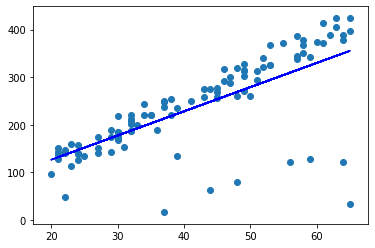

In [8]:
try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()

In [9]:
print(reg.score(ages_test,net_worths_test))

0.8782624703664671


In [10]:
ages_train.shape
net_worths_train.shape

(90, 1)

In [11]:
from outlier_cleaner import outlierCleaner
### identify and remove the most outlier-y points
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
except NameError:
    print ("your regression object doesn't exist, or isn't name reg")
    print ("can't make predictions to use in identifying outliers")


In [12]:
age_cleaned_data = np.array([x[0] for x in cleaned_data])
net_worths_cleaned_data = np.array([x[1] for x in cleaned_data])
reg.fit(age_cleaned_data,net_worths_cleaned_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
print(reg.coef_)
print(reg.intercept_)
print(reg.score(age_cleaned_data,net_worths_cleaned_data))

[[6.36859481]]
[-6.91861069]
0.9513734907601892


In [14]:
print(reg.score(ages_test,net_worths_test))

0.9831894553955322


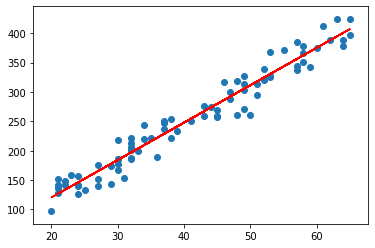

In [16]:
try:
    plt.plot(age_cleaned_data, reg.predict(age_cleaned_data), color="red")
except NameError:
    pass
plt.scatter(age_cleaned_data, net_worths_cleaned_data)
plt.show()